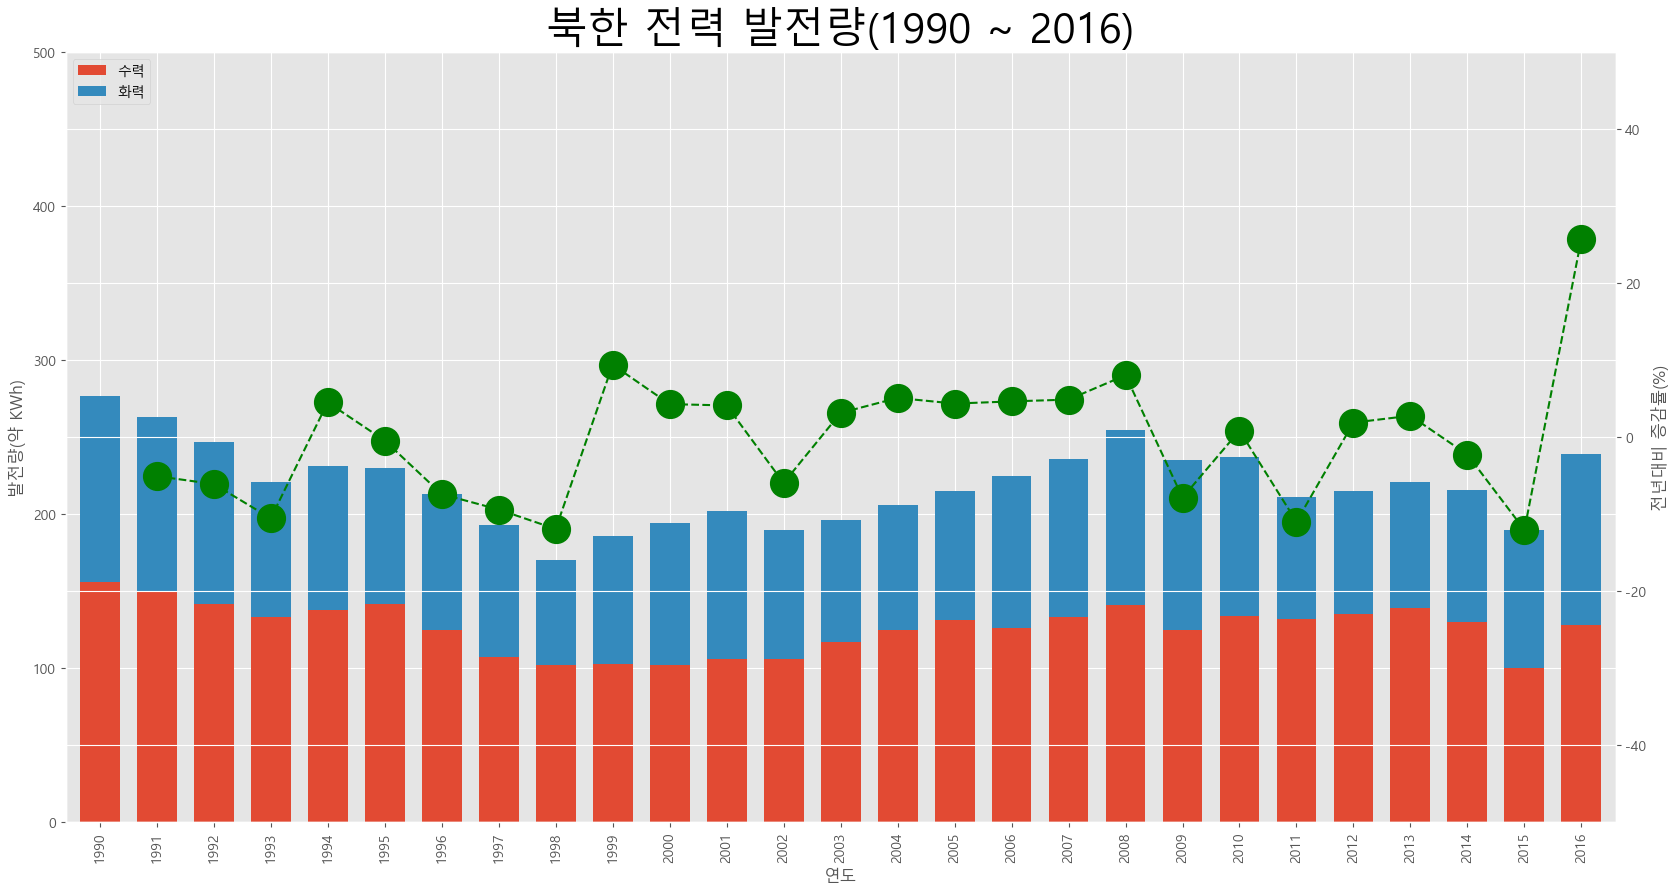

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_path="./data/malgun.ttf"
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False

df = pd.read_excel("./data/남북한발전전력량.xlsx")
df = df.loc[5:9]
df.drop('전력량 (억㎾h)',axis='columns',inplace=True)
df.set_index('발전 전력별',inplace=True)
df=df.T

for col in df.columns:
    df[col]=df[col].replace('-','0')

df=df.astype(float)

df=df.rename(columns={'합계':'총발전량'})
df['총발전량-1년']=df['총발전량'].shift(1)
df['증감률']=((df['총발전량']/df['총발전량-1년'])-1)*100

ax1=df[['수력','화력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index,df.증감률, ls='--', marker='o', markersize=20, color='green',
         label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)
plt.title('북한 전력 발전량(1990 ~ 2016)',size=30)
ax1.set_xlabel('연도')
ax1.set_ylabel('발전량(약 KWh)')
ax2.set_ylabel('전년대비 증감률(%)')
ax1.legend(loc='upper left')

plt.show()
